# Non-parametric models for density estimation

Non-parametric models for density estimation are models that its parameters do not define the form of the distribution. Indeed, parameters define the complexity of the model and the form is defined by the data given the complexity of the parameters. 

* advantages over parametric approach: 
An important limitation of parametric models is that the chosen density (parameters that define the form of the distribution) might be a poor model of the distribution that generates the data, which can result in poor predictive performance.



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math

## Histogram

It is the simplest form and is more a theoric approach than a pratical. **It is more used to data visualization.** Standard histograms simply partition x into distinct bins of width $\Delta_i$ and then count the number $n_i$ of observations of x falling in bin i. In order to turn this count into a normalized probability density, we simply divide by the total number N of observations and by the width $\Delta_i$ of the bins to obtain probability values for each bin given by,
$$p_i = \frac{n_i}{N \Delta_i}$$
This gives a model for the density p(x) that is constant over the width of each bin. In other words, **the probability of x is the probability of the bin it falling in.** 
The parameter $\Delta_i$ is usually constant $\Delta$ and governs the model complexity. It can been seen as smooth parameter where small values makes the distribution very spick and fitted to the data, providing less generalization. If it is to high it makes the distribution too smooth and fails to capture the data.  

### Problems with this approach:
1. Estimated density has discontinuities that are due to the bin edges
2. Exponential scaling with D is an example of the curse of dimensionality. Ex: If we divide each variable in a D-dimensional space into M bins, then the total number of bins will be $M^D$
3. Points in the same bin have the same probability





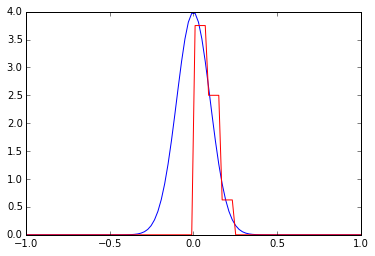

In [2]:
# NOT WORKING YET
# delta model parameter. Change to see the behaviour
delta = 0.08

# Consider the artificial data X as continuous variable between [0,1] that is generated by a bimodal distribution
# or sum of tow gaussians
xmax = 1; xmin = -1;
X = 0.1 * np.random.randn(20,1) + 0
points = np.linspace(-1,1,num=100)

#plot the curve
true_pdf = lambda v: st.norm.pdf(v,loc=0.0, scale=0.1)
plt.plot(points, true_pdf(points))

#compute bins probabilities
N = X.size
bins_num = math.ceil((xmax-xmin) / delta)
bins = np.zeros((bins_num,1))
for i in range(bins_num):
    bound = [delta * i, delta * (i+1)]
    if bound[1] == xmax:
        bins[i] = np.sum(np.logical_and(np.greater_equal(X,bound[0]),np.less_equal(X,bound[1]))) 
    else:
        bins[i] = np.sum(np.logical_and(np.greater_equal(X,bound[0]),np.less(X,bound[1])))

bins = bins / (N*delta)

prob = lambda v: bins[np.floor(v/delta).astype(int)]

#plot the histogram estimated density
plt.plot(points, prob(points),'-r')

## Kernel Density Estimation

All of the kernel methods come from the equation $p(x) = \frac{n_i}{N\Delta}$. In kernel density a **kernel function** is used to compute the value of $n_i$. A kernel function is a function that summarizes the data around a point. One simple way to construct a kernel function is to use bins which are hypercubes with sides of size h, as follows,

If x is the new instance whose density we want to estimate, and $x_1 , . . . , x_N$ are the training instances, let $||x − y||$ denote the distance between x and y according to the max norm, i.e., the maximum distance between x and y in any one dimension. so we get the kernel,
$$K(x) = count\left(x^i: ||x^i - x|| \leq \frac{h}{2}\right)$$
This kernel function describes a n-dimensional hipercube with sides h. This kernel has volume $V_x$ equal to $h^n$ and we can build the density estimator,
$$p(x) = \frac{n_i}{N\Delta} = \frac{K(x)}{NV_x} = \frac{K(x)}{Nh^n}$$
Using this reasoning we can build other estimators using any other kernel. For example if we prefer have **soft bins**, where it is allowed for a point to be partially in a bin, depending on its distance from the center. Then we can use the gaussian kernel,
$$K_g = \sum_i^n exp\left(- \frac{|x- x_i|^2}{2h^2}\right)$$
For a general kernel function, the volume $V_x$ is the expected value of the kernel function under a uniform density over the entire space. It is obtained by replacing the sum in the kernel function with an integral. In the case of gaussian kernel, $V_x = (2 \pi h^2)^{n/2}$ and the estimator p(x) is,
$$p(x) = \frac{1}{N} \sum_i^N \frac{1}{(2 \pi h^2)^{n/2}} exp\left(- \frac{|x- x_i|^2}{2h^2}\right)$$

Intuitively, what this does is take into account all training instances when computing the density at a given point. Instances are weighted according to their distance from the given point, with their weight decaying exponentially as they move further away as  gaussian. In other words, The gaussian kernel density model is obtained by placing a Gaussian over each data point and then adding up the contributions over the whole data set, and then dividing by N so that the density is correctly normalized.

As with histograms, the size h of bins is a smoothing parameter. When h is very small, the estimate will tend to be jagged, while with very large h, it will be very smooth.

These Kernel functions are not the same as support vector machine kernels. In kernel density estimation, kernel functions are function that produces positives values ($K(.) \geq 0$) and integrates to one.  


### Advantages and Problems with this approach

1. kernel density estimator converge to the true probability density in the limit N → ∞ provided V shrinks suitably with N , and K grows with N
2. The result is a continuous density estimator (without descontinuities).
3. There is no computation involved in the ‘training’ phase because this simply requires storage of the training set. However, this is also one of its great weaknesses because the computational cost of evaluating the density grows linearly with the size of the data set.


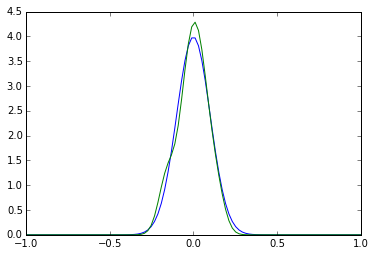

In [3]:
# hipercibe side h,  model parameter. Change to see the behaviour
h = 0.05

# Consider the artificial data X as continuous variable between [0,1] that is generated by a gaussian distribution
X = 0.1 * np.random.randn(20,1) + 0
points = np.linspace(-1,1,num=100)

#plot the curve of true distribution
true_pdf = lambda v: st.norm.pdf(v,loc=0, scale=0.1)
plt.plot(points, true_pdf(points))

#compute kernel gaussian desnsity from X
points = np.linspace(-1,1,num=100)
N = X.size
prob = lambda v: (1./N) * np.sum((1/pow((2*np.pi*h*h),0.5))* np.exp(-1*(np.power((v - X), 2) / (2*h*h))))
p = np.zeros(points.size)
for i in range(p.size):
    p[i] = prob(points[i])

#plot the distribution estimated    
plt.plot(points, p)



## K-Nearest Neighbours

K nearest neighbourh also come from the equation $p(x) = \frac{n_i}{NV}$, but differently from kernel density estimation it fixes the value $n_i$ and use the training data to determine the value for V. In order to do this, we consider each point in the training data as a sphere of radius r. We allow the radius of the sphere to grow until it contains precisely
K data points. Then we define the radius r equal to the distance (may be euclidean) between x and its $k_{th}$ neighbour. Then we estimate the distribution of x as follows,
$$p(x) = \frac{n_i}{NV} = \frac{K}{NV_{sphere}} = \frac{K}{N\frac{4 \pi r^3}{3}}$$

As before, k serves as a smoothing parameter. If k is small, particularly if k = 1, the method has a tendency to overfit. A single noisy training instance will affect all points that are closer to it than any other. As k grows larger, the effect of individual points is lessened and the model is smoothed.




### Advantages and Problems
1. In kernel density estimation the h governs the kernel width, and it is fixed for all kernels. It is sub optimal since depending of the distribution of the data some regions may require smaller or higher hypercubes. Dense regions -> small values, Sparse region -> big values.

2. Note that the model produced by K nearest neighbours is not a true density model because the integral over all space diverges.

3. This technique can be easily extended to be classifier called KNN
$$p(c_k|x) = \frac {p(x | c_k) p(c_k)}{p(x)} = \frac{\frac{K_k}{N_k V} \frac{N_k}{N}}{\frac{K}{N V}} = \frac{K_k}{K}$$

4. Likewise Kernel methods, it do not make any processing during the training but is expensive in test time since it is necessary comute distance to all training data. It also need to store all the data points in the training set.

5. It also suffer from the curse of dimensionality. The reason is that in high dimensions, a point is unlikely to have any close neighbors. The same apply for the kernel methods.


